In [75]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("updated_vimal1.csv")

In [76]:
df.head()

,uuid,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,...,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3,date,hour,min,month,day_name
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,31.3,34.8,15.0,male,False,False,healthy,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-04-13,21,30,4,Monday
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,40.0,-75.1,34.0,male,True,False,healthy,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-04-12,4,2,4,Sunday
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-04-15,1,3,4,Wednesday
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.9968,NaN,NaN,21.0,male,False,False,healthy,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-04-13,22,23,4,Monday
4,001c85a8-cc4d-4921-9297-848be52d4715,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-04-17,15,24,4,Friday


In [77]:
df.columns

Index(['uuid', 'cough_detected', 'latitude', 'longitude', 'age', 'gender',
       'respiratory_condition', 'fever_muscle_pain', 'status', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3', 'congestion_3',
       'nothing_3', 'cough_type_3', 'diagnosis_3', 'severity_3', 'date',
       'hour', 'min', 'month', 'day_name'],
      dtype='object')

In [78]:
df["status"].values

array(['healthy', 'healthy', nan, ..., nan, 'healthy', nan], dtype=object)

In [79]:
df.status.unique() #different type of values in status feature

array(['healthy', nan, 'COVID-19', 'symptomatic'], dtype=object)

In [80]:
df_more = df.replace('None', np.nan)

In [81]:
df_more = df.replace(np.nan, False) # replacing the np.nan values with false

df_more

,uuid,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,...,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3,date,hour,min,month,day_name
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,31.3,34.8,15.0,male,False,False,healthy,False,...,False,False,False,False,False,2020-04-13,21,30,4,Monday
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,40.0,-75.1,34.0,male,True,False,healthy,False,...,False,False,False,False,False,2020-04-12,4,2,4,Sunday
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,0.0482,-16.5,-71.5,False,False,False,False,False,False,...,False,False,False,False,False,2020-04-15,1,3,4,Wednesday
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.9968,False,False,21.0,male,False,False,healthy,False,...,False,False,False,False,False,2020-04-13,22,23,4,Monday
4,001c85a8-cc4d-4921-9297-848be52d4715,0.0735,40.6,-3.6,False,False,False,False,False,False,...,False,False,False,False,False,2020-04-17,15,24,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20067,fff13fa2-a725-49ef-812a-39c6cedda33d,0.7154,31.9,34.7,21.0,male,True,False,healthy,False,...,False,False,False,False,False,2020-04-13,17,51,4,Monday
20068,fff3ff61-2387-4139-938b-539db01e6be5,0.5257,51.6,-0.2,False,female,False,False,symptomatic,False,...,False,False,False,False,False,2020-06-28,21,28,6,Sunday
20069,fff474bf-39a4-4a61-8348-6b992fb5e439,0.1945,-39.0,-68.1,False,False,False,False,False,False,...,False,False,False,False,False,2020-04-10,5,10,4,Friday
20070,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,0.0243,41.0,28.8,50.0,male,True,True,healthy,False,...,False,False,False,False,False,2020-04-13,18,58,4,Monday


In [82]:
df_more.status.unique() # change in value after replacement of none and none..

array(['healthy', False, 'COVID-19', 'symptomatic'], dtype=object)

In [83]:
# df_more['healthy'] = False
# df_more['covid'] = 0.0
# df_more['unhealthy_but_no_covid'] = False

In [84]:
if "asthma" in df.columns:
     print(True)
else:
     print(False)     

False


In [85]:
df_more.columns
for i in list(df_more.columns):
    if i not in ["uuid", "cough_detected", "latitude",	"longitude",	"age"]:
        print(i, ":",df_more[i].unique())
    

gender : ['male' False 'female' 'other']
respiratory_condition : [False  True]
fever_muscle_pain : [False  True]
status : ['healthy' False 'COVID-19' 'symptomatic']
quality_1 : [False 'ok' 'poor' 'good' 'no_cough']
cough_type_1 : [False 'dry' 'wet' 'unknown']
dyspnea_1 : [False  True]
wheezing_1 : [False  True]
stridor_1 : [False]
choking_1 : [False  True]
congestion_1 : [False  True]
nothing_1 : [False  True]
diagnosis_1 : [False 'healthy_cough' 'lower_infection' 'COVID-19' 'obstructive_disease'
 'upper_infection']
severity_1 : [False 'pseudocough' 'mild' 'unknown' 'severe']
quality_2 : [False 'good' 'no_cough' 'ok' 'poor']
cough_type_2 : [False 'dry' 'unknown' 'wet']
dyspnea_2 : [False  True]
wheezing_2 : [False  True]
stridor_2 : [False  True]
choking_2 : [False  True]
congestion_2 : [False  True]
nothing_2 : [False  True]
diagnosis_2 : [False 'lower_infection' 'COVID-19' 'healthy_cough' 'obstructive_disease'
 'upper_infection']
severity_2 : [False 'mild' 'unknown' 'pseudocough' 'se

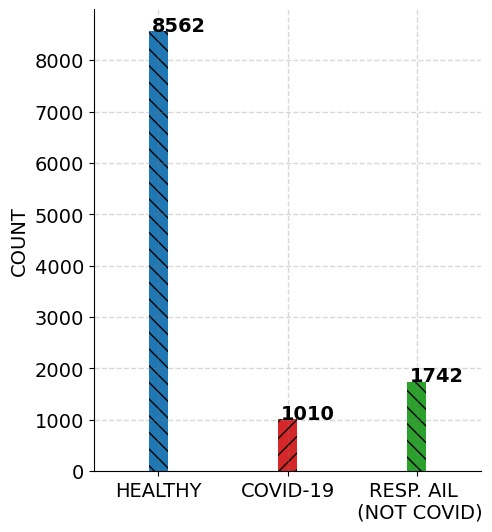

In [86]:


health_categories_cnt_all = []

# get healthy
health_categories_cnt_all.append(len(df_more[(df_more['status']=="healthy")]))

# get covid
health_categories_cnt_all.append(len(df_more[(df_more['status']=="COVID-19")]))

# get resp. ail.
health_categories_cnt_all.append(len(df_more[(df_more['status']== "symptomatic")]))


clr = ['tab:blue','tab:red','tab:green']

fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(2, health_categories_cnt_all[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[0],width=.3)
ax.bar(4, health_categories_cnt_all[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr[1],width=.3)
ax.bar(6, health_categories_cnt_all[2], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[2],width=.3)

plt.xticks([2,4,6],['HEALTHY','COVID-19','RESP. AIL \n (NOT COVID)'],rotation=0,fontsize=14)
for i, v in enumerate(health_categories_cnt_all):
    ax.text(2*(i+1)-.1,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,7)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()


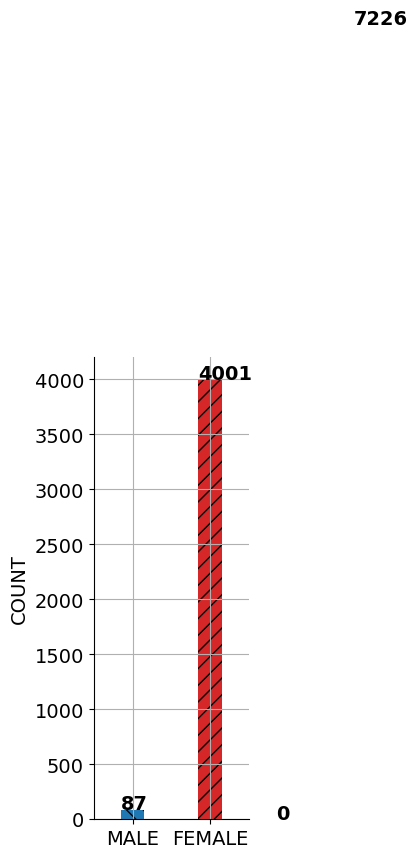

In [87]:
gender_labels = df['gender'].unique()[::-1]
gender_cnt = []
for i in range(len(gender_labels)):
    gender_cnt.append(len(df[(df['gender'] == gender_labels[i])]))# & (df['recording']=='breathing-deep')]))

clr_1 = 'tab:blue'
clr_2 = 'tab:red'
fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,gender_cnt[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.6)
ax.bar(4,gender_cnt[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.6)

for i, v in enumerate(gender_cnt):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
plt.xticks([2,4], ['MALE','FEMALE'],rotation=0)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(1,5)
# ax.set_ylim(200,1500)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_gender.pdf", bbox_inches='tight')
plt.show()